Generation 1: Fitness = 5091.0
Generation 2: Fitness = 6152.0
Generation 3: Fitness = 6152.0
Generation 4: Fitness = 7079.0
Generation 5: Fitness = 7079.0
Generation 6: Fitness = 7079.0
Generation 7: Fitness = 7079.0
Generation 8: Fitness = 7079.0
Generation 9: Fitness = 7079.0
Generation 10: Fitness = 7079.0
Generation 1: Fitness = 15151.0
Generation 2: Fitness = 15151.0
Generation 3: Fitness = 25294.0
Generation 4: Fitness = 25294.0
Generation 5: Fitness = 25294.0
Generation 6: Fitness = 59756.0
Generation 7: Fitness = 59756.0
Generation 8: Fitness = 59756.0
Generation 9: Fitness = 59756.0
Generation 10: Fitness = 59756.0
Generation 1: Fitness = 2584998.0
Generation 2: Fitness = 2584998.0
Generation 3: Fitness = 2584998.0
Generation 4: Fitness = 2584998.0
Generation 5: Fitness = 2584998.0
Generation 6: Fitness = 2584998.0
Generation 7: Fitness = 2584998.0
Generation 8: Fitness = 2584998.0
Generation 9: Fitness = 2584998.0
Generation 10: Fitness = 2584998.0
Generation 1: Fitness = 707

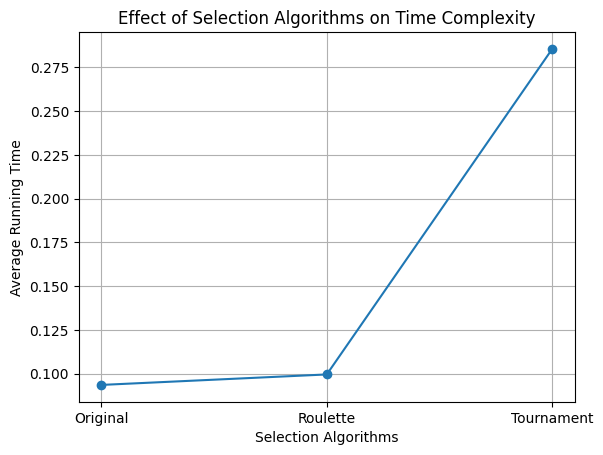

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from genetic_algorithm_original import GeneticAlgorithm
from roulette_ga import GeneticAlgorithmRoulette
from tournament_ga import GeneticAlgorithmTournament
import pickle
import os
import time
# Define the mutation rates to test
mutation_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
population_size = [50, 100, 150, 200, 1000]
number_of_iterations = [10, 20, 30, 100, 1000]
DATASET_DIR = "datasets/"
# DATASET_NAME = "dataset1/"
# with open(os.path.join(DATASET_DIR, DATASET_NAME, "requirements.pkl"), "rb") as f:
#     requirements: np.ndarray = pickle.load(f)

# with open(os.path.join(DATASET_DIR, DATASET_NAME, "proficiency_levels.pkl"), "rb") as f:
#     proficiency_levels: np.ndarray = pickle.load(f)

fitness_values = []
algorithms = [GeneticAlgorithm, GeneticAlgorithmRoulette, GeneticAlgorithmTournament]
algo_names = ['Original', 'Roulette', "Tournament"]
datasets = ["dataset1/", "dataset2/", "dataset3/"]
for algo in algorithms:
    total_time = 0
    for dataset in datasets:
        with open(os.path.join(DATASET_DIR, dataset, "requirements.pkl"), "rb") as f:
            requirements: np.ndarray = pickle.load(f)

        with open(os.path.join(DATASET_DIR, dataset, "proficiency_levels.pkl"), "rb") as f:
            proficiency_levels: np.ndarray = pickle.load(f)
        ga = algo(requirements, proficiency_levels, num_gen=10)
        start = time.time()
        best_chromosome = ga.run()
        end = time.time()
        # best_fitness = ga.calculate_fitness(best_chromosome)
        total_time += (end - start)
    fitness_values.append(total_time / len(datasets))

plt.plot(algo_names, fitness_values, marker='o')
plt.xlabel('Selection Algorithms')
plt.ylabel('Average Running Time(second)')
plt.title('Effect of Selection Algorithms on Time Complexity')
plt.grid(True)
plt.show()